In [1]:
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.colors as mcolors

import json
import folium

import squarify

In [2]:
from sklearn.metrics.pairwise import haversine_distances
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import cluster_optics_dbscan
import matplotlib.gridspec as gridspec
from sklearn import datasets

from sklearn.cluster import KMeans
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans

In [3]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [4]:
df = pd.read_excel('./숙소위치기반_교통_관광_통계정보_final.xlsx')

In [5]:
df

,이름,종류,평점,숙박가격,도보시간,인기테그,별점 높은순 후기,별점 낮은순 후기,주소,객실수,...,지하철역_평균거리(1km내),교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내)
0,앰배서더 서울 풀만 호텔,프리미엄호텔,4.8,250000,동대입구역 1번출구 250m,"['주차가능', '야외수영장', '수영장', '와이파이', '사우나', '클럽라운지...","['시설에 비해 가격도 저렴합니당', '너무너무 깨끗하고 쾌적합니다.', '룸서비스...",[],서울특별시 중구 동호로 287,269,...,0.72,65461.18,66068.77,131529.95,6,6,0.61,0.82,0.57,0.79
1,글래드 여의도,4성급,4.7,200640,국회의사당역 4번출구 도보 1분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '바', ...","['정말 좋아요 말이 필요 없어요!', '컨디션은 항상 너무 좋네요! 최저가로 저렴...","['데이유즈 쪼매난 글씨에 속아 숙박전환 추가 55천원내고 아주 식겁시키네요', '...",서울특별시 영등포구 의사당대로 16,319,...,0.62,44340.55,47327.44,91667.99,9,2,0.19,0.63,0.75,0.87
2,글래드 마포,4성급,4.8,143000,공덕역 바로 앞,"['주차가능', '와이파이', '객실금연', '피트니스', '어메니티', '비즈니스']","['너무 좋았습니다! 다음에 재방문할게요~~!', '자주 놀러가는 곳이에요', '완...","['난방이 안되는 호텔춥다고 했더니 체크인시 얘기했는데 어쩌라는 호텔', '지방에 ...",서울특별시 마포구 마포대로 92,378,...,0.42,20412.48,20203.94,40616.42,3,3,0.70,0.79,0.18,0.23
3,더 리프 사당,일반호텔,4.3,265000,서울특별시 관악구 남현 1길 66 사당역 5번 출구 도보 1분,"['스파/월풀/욕조', '와이파이', '객실금연', '24시간데스크', '비즈니스'...","['너무좋았어용', '너무 친절하시고 시설이 이쁘고 깔끔해서 좋았어요', '기념일 ...",[],서울특별시 관악구 남현1길 66,한국어,...,0.12,50042.49,51264.60,101307.08,9,3,0.16,0.71,0.49,0.81
4,나인트리 프리미어 로카우스 호텔 서울 용산,일반호텔,4.7,158000,용산역 1번 출구 도보 3분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '연회장'...","['호캉스하기 좋아요', '좋아용 이용 추천', '어린 아이들이 놀기 좋은 적당한 ...",[],서울특별시 용산구 한강대로23길 25,274,...,0.53,23528.91,23727.87,47256.78,15,7,0.13,0.50,0.14,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,서울 인사동알게스트하우스,게스트하우스,4.8,60000,숙소 위치보기,['와이파이'],"['사장님너무친절하시고따뜻방이라 너무좋앗습니다', '깨끗하고 자취방 같이 아늑합니다...",[],서울특별시 종로구 수표로28길 12-3,NaN,...,0.55,79574.44,78905.40,158479.84,14,3,0.22,0.66,0.38,0.62
1202,서울 룩스게스트하우스,게스트하우스,3.6,57000,숙소 위치보기,['와이파이'],"['수건 많음, 화장실은 살짝 냄새남, 잠 자기에는 편했음, 이불이 푹신했음', '...",[],서울특별시 마포구 와우산로 156 5층,NaN,...,0.58,40666.26,40033.71,80699.97,24,8,0.04,0.58,0.28,0.48
1203,서울 Bottlehouse펜션,펜션/호스텔,4.0,108000,숙소 위치보기,"['와이파이', '독채객실']","['좋았어요!!!', '??숙소는 역근처 건물 3층에 위치하고 있어요. 찾아오기 어...",[],서울특별시 구로구 경인로25길 16 301호,NaN,...,0.31,7937.43,7486.39,15423.81,2,2,0.26,0.45,0.09,0.43
1204,서울 종로준오호텔펜션,펜션/호스텔,5.0,90000,숙소 위치보기,"['와이파이', '상비약']",['숙소 깔끔하고 인테리어도 분위기 있어요! 특히 화장실 청소 잘되있습니다! 사장님...,[],서울특별시 종로구 인사동16길 6,NaN,...,0.66,75400.56,73681.34,149081.91,23,4,0.09,0.60,0.09,0.70


In [6]:
# make kmeans clustring.
# variate n_clusters as I want
X = df[['위도', '경도']].values
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
df['label'] = labels
df

c:\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,이름,종류,평점,숙박가격,도보시간,인기테그,별점 높은순 후기,별점 낮은순 후기,주소,객실수,...,교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내),label
0,앰배서더 서울 풀만 호텔,프리미엄호텔,4.8,250000,동대입구역 1번출구 250m,"['주차가능', '야외수영장', '수영장', '와이파이', '사우나', '클럽라운지...","['시설에 비해 가격도 저렴합니당', '너무너무 깨끗하고 쾌적합니다.', '룸서비스...",[],서울특별시 중구 동호로 287,269,...,65461.18,66068.77,131529.95,6,6,0.61,0.82,0.57,0.79,10
1,글래드 여의도,4성급,4.7,200640,국회의사당역 4번출구 도보 1분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '바', ...","['정말 좋아요 말이 필요 없어요!', '컨디션은 항상 너무 좋네요! 최저가로 저렴...","['데이유즈 쪼매난 글씨에 속아 숙박전환 추가 55천원내고 아주 식겁시키네요', '...",서울특별시 영등포구 의사당대로 16,319,...,44340.55,47327.44,91667.99,9,2,0.19,0.63,0.75,0.87,8
2,글래드 마포,4성급,4.8,143000,공덕역 바로 앞,"['주차가능', '와이파이', '객실금연', '피트니스', '어메니티', '비즈니스']","['너무 좋았습니다! 다음에 재방문할게요~~!', '자주 놀러가는 곳이에요', '완...","['난방이 안되는 호텔춥다고 했더니 체크인시 얘기했는데 어쩌라는 호텔', '지방에 ...",서울특별시 마포구 마포대로 92,378,...,20412.48,20203.94,40616.42,3,3,0.70,0.79,0.18,0.23,11
3,더 리프 사당,일반호텔,4.3,265000,서울특별시 관악구 남현 1길 66 사당역 5번 출구 도보 1분,"['스파/월풀/욕조', '와이파이', '객실금연', '24시간데스크', '비즈니스'...","['너무좋았어용', '너무 친절하시고 시설이 이쁘고 깔끔해서 좋았어요', '기념일 ...",[],서울특별시 관악구 남현1길 66,한국어,...,50042.49,51264.60,101307.08,9,3,0.16,0.71,0.49,0.81,9
4,나인트리 프리미어 로카우스 호텔 서울 용산,일반호텔,4.7,158000,용산역 1번 출구 도보 3분,"['주차가능', '조식운영', '와이파이', '객실금연', '레스토랑', '연회장'...","['호캉스하기 좋아요', '좋아용 이용 추천', '어린 아이들이 놀기 좋은 적당한 ...",[],서울특별시 용산구 한강대로23길 25,274,...,23528.91,23727.87,47256.78,15,7,0.13,0.50,0.14,0.43,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,서울 인사동알게스트하우스,게스트하우스,4.8,60000,숙소 위치보기,['와이파이'],"['사장님너무친절하시고따뜻방이라 너무좋앗습니다', '깨끗하고 자취방 같이 아늑합니다...",[],서울특별시 종로구 수표로28길 12-3,NaN,...,79574.44,78905.40,158479.84,14,3,0.22,0.66,0.38,0.62,0
1202,서울 룩스게스트하우스,게스트하우스,3.6,57000,숙소 위치보기,['와이파이'],"['수건 많음, 화장실은 살짝 냄새남, 잠 자기에는 편했음, 이불이 푹신했음', '...",[],서울특별시 마포구 와우산로 156 5층,NaN,...,40666.26,40033.71,80699.97,24,8,0.04,0.58,0.28,0.48,11
1203,서울 Bottlehouse펜션,펜션/호스텔,4.0,108000,숙소 위치보기,"['와이파이', '독채객실']","['좋았어요!!!', '??숙소는 역근처 건물 3층에 위치하고 있어요. 찾아오기 어...",[],서울특별시 구로구 경인로25길 16 301호,NaN,...,7937.43,7486.39,15423.81,2,2,0.26,0.45,0.09,0.43,5
1204,서울 종로준오호텔펜션,펜션/호스텔,5.0,90000,숙소 위치보기,"['와이파이', '상비약']",['숙소 깔끔하고 인테리어도 분위기 있어요! 특히 화장실 청소 잘되있습니다! 사장님...,[],서울특별시 종로구 인사동16길 6,NaN,...,75400.56,73681.34,149081.91,23,4,0.09,0.60,0.09,0.70,0


In [7]:
df.to_excel("hotel_clustering.xlsx")  

In [8]:
# # Generate a list of labels
# labels = np.arange(n_clusters)

# # Choose a colormap
# cmap = plt.get_cmap('tab20')

# # Generate a list of colors based on the labels
# colors = [cmap(i) for i in labels % cmap.N]

# # Print the colors
# print(len(colors))

In [9]:
# calculate density of each clustering group
densities = []
for i in range(n_clusters):
    group = X[kmeans.labels_ == i]
    density = gaussian_kde(group.T)(group.T)
    densities.append(np.mean(density))
    print(f'this is {i}_th density:{i}:',densities[i])


this is 0_th density:0: 1874.1530662144216
this is 1_th density:1: 2913.5730366050166
this is 2_th density:2: 1062.2742696056441
this is 3_th density:3: 1122.1085712725057
this is 4_th density:4: 3026.9765226380537
this is 5_th density:5: 442.5285862997727
this is 6_th density:6: 997.2974379021394
this is 7_th density:7: 1497.5234046629057
this is 8_th density:8: 1450.9952242028273
this is 9_th density:9: 957.6083319080395
this is 10_th density:10: 957.4134768971321
this is 11_th density:11: 2234.583204201275
this is 12_th density:12: 1968.2937447909665
this is 13_th density:13: 2293.3770253594007
this is 14_th density:14: 740.1335216942092


In [10]:
df['label'].unique()

array([10,  8, 11,  9, 14,  2,  7,  0,  5, 13, 12,  1,  4,  3,  6])

In [11]:
#colors = ['#E31B25', '#BCBDBD', '#F9D72A', '#26A59A', '#529FCD', '#FABD9E', '#FDBF6F', '#7FC97F', '#CAB2D6', '#FFFFB3']

colors = ['#E31B25', '#BCBDBD', '#F9D72A', '#26A59A', '#529FCD', '#FABD9E', '#FDBF6F', '#7FC97F', '#CAB2D6', '#FFFFB3',
          '#FF7F00', '#FB9A99', '#33A02C', '#B2DF8A', '#1F78B4']

In [12]:
seoul_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain', zoom_start=12)

In [13]:
df[(df['label'] == 7) & (df['종류'] == '모텔')]

,이름,종류,평점,숙박가격,도보시간,인기테그,별점 높은순 후기,별점 낮은순 후기,주소,객실수,...,교통유동인구_월평균승차수(1km내),교통유동인구_월평균하차수(1km내),교통유동인구_월평균승하차총계(1km내),관광지_수(1km내),쇼핑몰_수(1km내),관광지_최단거리(1km내),관광지_평균거리(1km내),쇼핑몰_최단거리(1km내),쇼핑몰_평균거리(1km내),label
797,은평 씨에스 에비뉴 호텔,모텔,4.7,75000,녹번역 3번출구 도보 2분,"['주차가능', '무료영화(OTT)', '와이파이', '트윈베드', '객실금연', ...","['너무너무 좋아용 ㅎㅎㅎ컴퓨터도 잘돌아가고, 청결하고, 직원분들도 친절하고 ㅎㅎ'...",NaN,서울특별시 은평구 통일로 585-1 (응암동),70,...,20798.52,21281.80,42080.32,0,0,NaN,NaN,NaN,NaN,7
798,은평 브릭스 호텔,모텔,4.7,90000,서부병원앞,"['스파/월풀/욕조', '주차가능', '파티룸', '와이파이', '복층구조', '야...","['너무 좋습니다', '친절하고 좋아요', '잘쉬다가요', '좋은 곳입니다', '일...","['.....', '정말 최악이었음체크아웃 당일 10시에 누가 잠겨있는 객실 문을 ...",서울 은평구 은평로8길 1 (응암동),53,...,17132.52,17125.84,34258.37,3,3,0.61,0.72,0.11,0.49,7
799,연신내 HOTEL THE ARTIST,모텔,4.7,80000,GS25 편의점 인근,"['스파/월풀/욕조', '주차가능', '파티룸', '트윈베드', '흡연구역', '객...",['일주일에 한번씩 사용하네요 정말 좋습니다 연신내에서 가장 깨끗하고 깔끔한 호텔 ...,"['화장실에서 담배냄새나고 이불에 먼지가 많아요', '배성일님 호텔 디 아티스트 연...",서울특별시 은평구 통일로 891 (갈현동),48,...,20494.89,20202.31,40697.20,4,4,0.63,0.78,0.37,0.42,7
800,불광 FORESTAR (포레스타),모텔,4.4,80000,불광역 3번출구 인근,"['스파/월풀/욕조', '주차가능', '객실내PC', '무료영화(OTT)', '거울...","['잘 쉬고 갑니다.', '안녕하세요^^ 포레스타호텔 관리자 입니다!우선 저희 포...",['제가 웬만해선 귀찮아서 리뷰를 안 남기는데.. 이번에는 저희와 같은 피해자가 생...,서울특별시 은평구 진흥로 179(대조동),58,...,21512.72,22683.38,44196.10,8,4,0.13,0.45,0.13,0.18,7
801,불광 라비다 호텔,모텔,4.8,60000,숙소 위치보기,"['주차가능', '와이파이', 'VOD', '어메니티', '24시간데스크', '비즈...","['괜찮았습니다.', '주렁주렁나무늘보0118 님안녕하세요저희 라비다를 이용해 주셔...",['사진으로는 넓어보이고 고급스러워보여 갔는데 생각보다 좁고 샤워기도 따뜻한물 느리...,서울특별시 은평구 통일로65길 10-4,29,...,21849.65,21343.23,43192.89,8,4,0.10,0.42,0.10,0.18,7
802,은평 Opposite Standard (오포짓 스탠다드),모텔,4.8,85000,역촌역 4번 출구 도보 5분,"['스파/월풀/욕조', '주차가능', '무료영화(OTT)', '와이파이', '야외테...",['자주 이용하지만 이용할때마다 너무 쾌적하고 좋습니다객실 인테리어도 굉장히 프라이...,"['비품(샤워용품) 교체하지않고, 겉에 쓴 흔적도 있어서 바꿔달라고 요청을 했는데...",서울특별시 은평구 서오릉로 17,18,...,26696.44,26783.95,53480.39,7,5,0.82,0.92,0.57,0.73,7
803,불광 CS,모텔,4.7,65000,불광역 3번출구 도보 2분,"['스파/월풀/욕조', '주차가능', '커플PC', '무료영화(OTT)', '게임'...","['좋아요 굿굿', '항상 만족합니다~', '잘 쉬다갑니다.매우좋았어요', '좋았습...",['왠만해선 리뷰를 안쓰는데 방 담배 냄새가 너무너무 심해요 환기하고 2시간 나갔다...,서울 은평구 진흥로 183 (대조동),30,...,26097.74,26755.29,52853.03,8,4,0.15,0.42,0.15,0.21,7
804,응암 시크,모텔,4.7,75000,6호선 새절역 2번 출구 도보 7분,"['스파/월풀/욕조', '주차가능', '커플PC', '객실내PC', '무료영화(OT...","['매번 잘 쉬고 갑니다!', '항상 잘 쉬다 갑니다!', '좋아요 ㅎㅎ', '항상...","['청소상태가 너무 안좋았습니다.', '베니스걷기06님 안녕하세요..이용중 불편을 ...",서울특별시 은평구 응암로11길 12-2 (응암동),28,...,13397.74,12898.25,26295.99,4,3,0.75,0.79,0.28,0.53,7
805,연신내 타오호텔,모텔,4.3,60000,숙소 위치보기,"['주차가능', '무료영화(OTT)', 'PC라운지', '와이파이', '스낵바', ...","['깔끔하고 사장님 친절하세요', '가성비 최곱니다요', '????????', '잘...","['일단 여자 머리카락 나오고 꼬털,신음소리는 기본 거미줄에 먼지에 방 안에 뭔 조...",서울특별시 은평구 통일로 863-24,32,...,20769.16,20449.80,41218.95,4,5,0.41,0.59,0.20,0.37,7
806,연신내 폼,모텔,4.4,55000,연신내역 4번 출구 인근,"['스파/월풀/욕조', '무료영화(OTT)', '와이파이', '24시간데스크', '...",['처음 이용해봤는데 깔끔하구 좋아요 ! 욕조도 있고 방에서 담배 냄새도 안나요 침...,['두번째방문..첨엔 그냥그럼 두번짼... 침대옆으로 누워 폰하다가 눈앞에 검은물체...,서울특별시 은평구 연서로28길 21-1,43,...,27395.03,26593.56,53988.59,5,8,0.17,0.55,0.18,0.57,7


In [14]:
df['종류'].unique()

array(['프리미엄호텔', '4성급', '일반호텔', '3성급', '5성급', '2성급', '레지던스', '1성급',
       '전통호텔', '모텔', '게스트하우스', '펜션/호스텔'], dtype=object)

In [15]:
# dfs=[]
# 10 should match in clustering code.
for i in range(n_clusters):   
    print(i)
    dfs_i = df[(df['label'] == i)]
    print(densities[i], colors[i])
    for name, lat, lng in zip(dfs_i.index, dfs_i.위도, dfs_i.경도):
        folium.CircleMarker([lat, lng], radius=7, color=colors[i],
                            fill=True, fill_color=colors[i],
                            fill_opacity=0.1,
                            popup=i).add_to(seoul_map)

0
1874.1530662144216 #E31B25
1
2913.5730366050166 #BCBDBD
2
1062.2742696056441 #F9D72A
3
1122.1085712725057 #26A59A
4
3026.9765226380537 #529FCD
5
442.5285862997727 #FABD9E
6
997.2974379021394 #FDBF6F
7
1497.5234046629057 #7FC97F
8
1450.9952242028273 #CAB2D6
9
957.6083319080395 #FFFFB3
10
957.4134768971321 #FF7F00
11
2234.583204201275 #FB9A99
12
1968.2937447909665 #33A02C
13
2293.3770253594007 #B2DF8A
14
740.1335216942092 #1F78B4


In [16]:
seoul_map

In [17]:
densities

[1874.1530662144216,
 2913.5730366050166,
 1062.2742696056441,
 1122.1085712725057,
 3026.9765226380537,
 442.5285862997727,
 997.2974379021394,
 1497.5234046629057,
 1450.9952242028273,
 957.6083319080395,
 957.4134768971321,
 2234.583204201275,
 1968.2937447909665,
 2293.3770253594007,
 740.1335216942092]

In [18]:
x =np.arange(n_clusters).tolist()
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [19]:
df_plt = pd.DataFrame({'label': x, 'density': densities})
df_plt

,label,density
0,0,1874.153066
1,1,2913.573037
2,2,1062.274270
3,3,1122.108571
4,4,3026.976523
5,5,442.528586
6,6,997.297438
7,7,1497.523405
8,8,1450.995224
9,9,957.608332


In [20]:
df_plt = df_plt.sort_values('density', ascending=False)
df_plt

,label,density
4,4,3026.976523
1,1,2913.573037
13,13,2293.377025
11,11,2234.583204
12,12,1968.293745
0,0,1874.153066
7,7,1497.523405
8,8,1450.995224
3,3,1122.108571
2,2,1062.274270


In [21]:
df_plt['label'] = df_plt['label'].astype('str')

In [28]:
label2 = df_plt['label'].astype(int).tolist()
label2

[4, 1, 13, 11, 12, 0, 7, 8, 3, 2, 6, 9, 10, 14, 5]

In [32]:
len(colors)

15

In [33]:
len(label2)

15

In [ ]:
colors = ['#E31B25', '#BCBDBD', '#F9D72A', '#26A59A', '#529FCD', '#FABD9E', '#FDBF6F', '#7FC97F', '#CAB2D6', '#FFFFB3',
          '#FF7F00', '#FB9A99', '#33A02C', '#B2DF8A', '#1F78B4']

In [40]:
colors2=[]

for i in range(len(label2)):
    print(i)
    print(label2[i])
    print('---------')
    colors2.append(colors[label2[i]])

0
4
---------
1
1
---------
2
13
---------
3
11
---------
4
12
---------
5
0
---------
6
7
---------
7
8
---------
8
3
---------
9
2
---------
10
6
---------
11
9
---------
12
10
---------
13
14
---------
14
5
---------


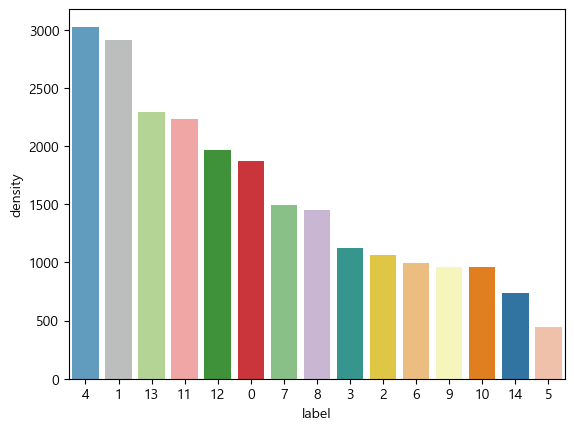

In [41]:
sns.barplot(x='label', y='density', data=df_plt, palette=colors2)
plt.show()

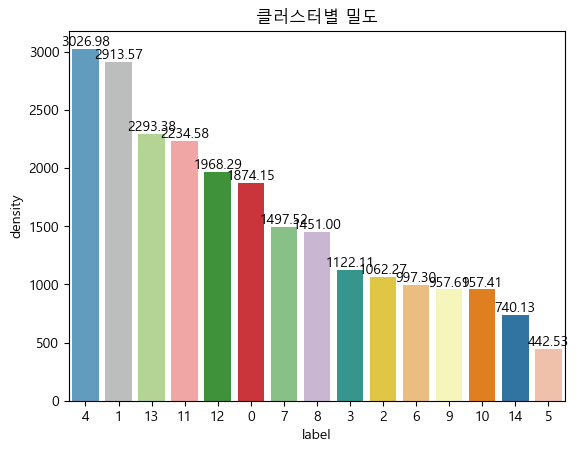

In [44]:

# Create the bar plot
ax = sns.barplot(x='label', y='density', data=df_plt, palette=colors2)

# Add value annotations to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('클러스터별 밀도', fontsize=12)
# Display the plot
plt.show()